In [1]:
import pandas as pd

# Load the saved CSV file
data = pd.read_csv('processed_data.csv')


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader

# Define target and input variables
target_cols = ['Median_meltLength', 'meanNumPixels15']
input_cols = ['Power', 'd_edge', 'd_over', 'd_col', 'd_over_z']

# Extract features and targets
X = data[input_cols].values
y = data[target_cols].values

# Create a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Function to prepare data loaders for a specific fold
def prepare_fold_data(X, y, train_idx, val_idx, batch_size=32):
    # Scale the features
    scaler = MinMaxScaler()
    scaler_y = MinMaxScaler()
    
    X_train = scaler.fit_transform(X[train_idx])
    X_val = scaler.transform(X[val_idx])
    y_train = scaler_y.fit_transform(y[train_idx])
    y_eval = scaler_y.transform(y[val_idx])
    
    # Create datasets
    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_eval)
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False
    )
    
    return train_loader, val_loader, scaler, scaler_y

# Set up K-Fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store fold indices for later use
fold_indices = []
for train_idx, val_idx in kf.split(X):
    fold_indices.append((train_idx, val_idx))



Training Fold 1
Epoch [10/1000], Train Loss: 0.088938, Val Loss: 0.087255
Epoch [20/1000], Train Loss: 0.084666, Val Loss: 0.082615
Epoch [30/1000], Train Loss: 0.084082, Val Loss: 0.082166
Epoch [40/1000], Train Loss: 0.085113, Val Loss: 0.081166
Epoch [50/1000], Train Loss: 0.084696, Val Loss: 0.086989
Epoch [60/1000], Train Loss: 0.084179, Val Loss: 0.080361
Epoch [70/1000], Train Loss: 0.083467, Val Loss: 0.081082
Epoch [80/1000], Train Loss: 0.082998, Val Loss: 0.080064
Epoch [90/1000], Train Loss: 0.083875, Val Loss: 0.080598
Epoch [100/1000], Train Loss: 0.083991, Val Loss: 0.080366
Epoch [110/1000], Train Loss: 0.081403, Val Loss: 0.079377
Epoch [120/1000], Train Loss: 0.081626, Val Loss: 0.079406
Epoch [130/1000], Train Loss: 0.081136, Val Loss: 0.079366
Epoch [140/1000], Train Loss: 0.080637, Val Loss: 0.079828
Epoch [150/1000], Train Loss: 0.080585, Val Loss: 0.077832
Epoch [160/1000], Train Loss: 0.079732, Val Loss: 0.077516
Epoch [170/1000], Train Loss: 0.079761, Val Loss

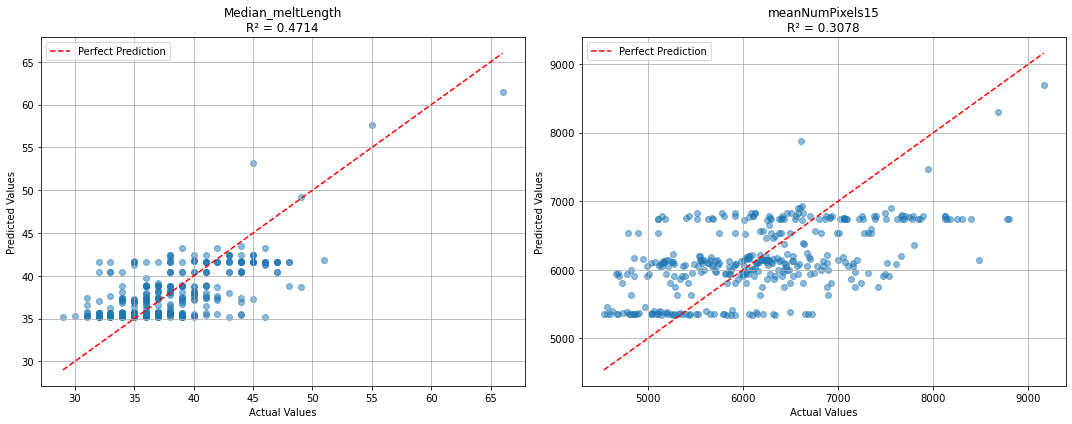


Evaluation Metrics:
MSE: 282192.6510
R² (Median_meltLength): 0.4714
R² (meanNumPixels15): 0.3078
Fold 1 Validation MSE: 282192.6510
Fold 1 R² scores: ['0.4714', '0.3078']

Training Fold 2
Epoch [10/1000], Train Loss: 0.097932, Val Loss: 0.092576
Epoch [20/1000], Train Loss: 0.090767, Val Loss: 0.087165
Epoch [30/1000], Train Loss: 0.086332, Val Loss: 0.080369
Epoch [40/1000], Train Loss: 0.084949, Val Loss: 0.081344
Epoch [50/1000], Train Loss: 0.084937, Val Loss: 0.080662
Epoch [60/1000], Train Loss: 0.083794, Val Loss: 0.079659
Epoch [70/1000], Train Loss: 0.084397, Val Loss: 0.079427
Epoch [80/1000], Train Loss: 0.083526, Val Loss: 0.080413
Epoch [90/1000], Train Loss: 0.083503, Val Loss: 0.079450
Epoch [100/1000], Train Loss: 0.083772, Val Loss: 0.080411
Epoch [110/1000], Train Loss: 0.082674, Val Loss: 0.079809
Epoch [120/1000], Train Loss: 0.083766, Val Loss: 0.080564
Epoch [130/1000], Train Loss: 0.083840, Val Loss: 0.081272
Epoch [140/1000], Train Loss: 0.082069, Val Loss: 0.0

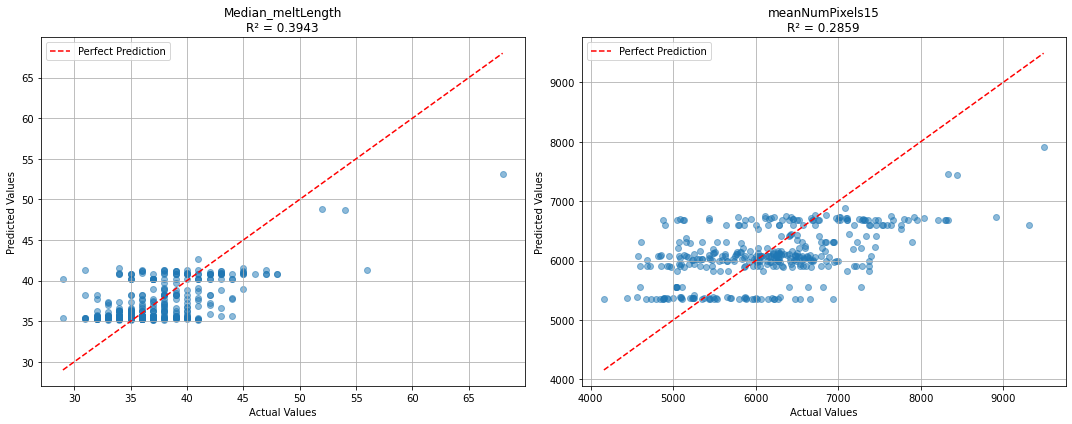


Evaluation Metrics:
MSE: 280034.0256
R² (Median_meltLength): 0.3943
R² (meanNumPixels15): 0.2859
Fold 2 Validation MSE: 280034.0256
Fold 2 R² scores: ['0.3943', '0.2859']

Training Fold 3
Epoch [10/1000], Train Loss: 0.089597, Val Loss: 0.091566
Epoch [20/1000], Train Loss: 0.086468, Val Loss: 0.089466
Epoch [30/1000], Train Loss: 0.087293, Val Loss: 0.086571
Epoch [40/1000], Train Loss: 0.085472, Val Loss: 0.088056
Epoch [50/1000], Train Loss: 0.087848, Val Loss: 0.086708
Epoch [60/1000], Train Loss: 0.085114, Val Loss: 0.084699
Epoch [70/1000], Train Loss: 0.085502, Val Loss: 0.086323
Epoch [80/1000], Train Loss: 0.084687, Val Loss: 0.085321
Epoch [90/1000], Train Loss: 0.085098, Val Loss: 0.084310
Epoch [100/1000], Train Loss: 0.083514, Val Loss: 0.082330
Epoch [110/1000], Train Loss: 0.082353, Val Loss: 0.082561
Epoch [120/1000], Train Loss: 0.084311, Val Loss: 0.084117
Epoch [130/1000], Train Loss: 0.082410, Val Loss: 0.085057
Epoch [140/1000], Train Loss: 0.085870, Val Loss: 0.0

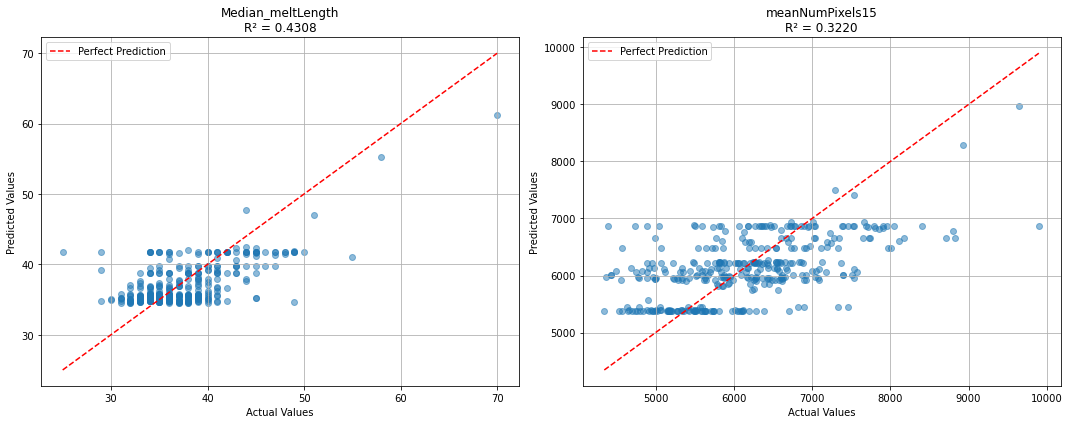


Evaluation Metrics:
MSE: 297938.9350
R² (Median_meltLength): 0.4308
R² (meanNumPixels15): 0.3220
Fold 3 Validation MSE: 297938.9350
Fold 3 R² scores: ['0.4308', '0.3220']

Training Fold 4
Epoch [10/1000], Train Loss: 0.097161, Val Loss: 0.100354
Epoch [20/1000], Train Loss: 0.098032, Val Loss: 0.100916
Epoch [30/1000], Train Loss: 0.097374, Val Loss: 0.100787
Epoch [40/1000], Train Loss: 0.098355, Val Loss: 0.101937
Epoch [50/1000], Train Loss: 0.097354, Val Loss: 0.099964
Epoch [60/1000], Train Loss: 0.097123, Val Loss: 0.100512
Epoch [70/1000], Train Loss: 0.097388, Val Loss: 0.100945
Epoch [80/1000], Train Loss: 0.097696, Val Loss: 0.100055
Epoch [90/1000], Train Loss: 0.097091, Val Loss: 0.100375
Epoch [100/1000], Train Loss: 0.097338, Val Loss: 0.101334
Epoch [110/1000], Train Loss: 0.097487, Val Loss: 0.100545
Early stopping triggered at epoch 115


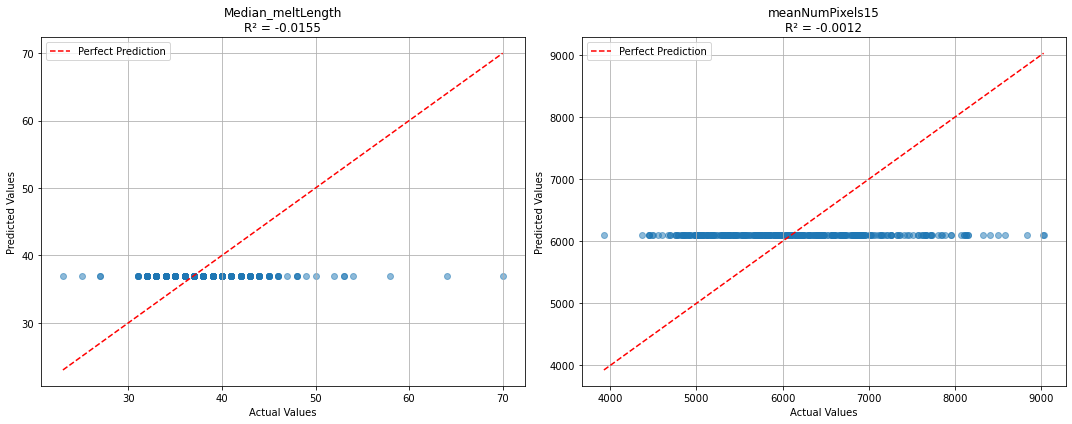


Evaluation Metrics:
MSE: 435315.3344
R² (Median_meltLength): -0.0155
R² (meanNumPixels15): -0.0012
Fold 4 Validation MSE: 435315.3344
Fold 4 R² scores: ['-0.0155', '-0.0012']

Training Fold 5
Epoch [10/1000], Train Loss: 0.095758, Val Loss: 0.099837
Epoch [20/1000], Train Loss: 0.097722, Val Loss: 0.093165
Epoch [30/1000], Train Loss: 0.090435, Val Loss: 0.089576
Epoch [40/1000], Train Loss: 0.088862, Val Loss: 0.088843
Epoch [50/1000], Train Loss: 0.088508, Val Loss: 0.090393
Epoch [60/1000], Train Loss: 0.083928, Val Loss: 0.085059
Epoch [70/1000], Train Loss: 0.084434, Val Loss: 0.086730
Epoch [80/1000], Train Loss: 0.083667, Val Loss: 0.085484
Epoch [90/1000], Train Loss: 0.082577, Val Loss: 0.086282
Epoch [100/1000], Train Loss: 0.082599, Val Loss: 0.085960
Epoch [110/1000], Train Loss: 0.084236, Val Loss: 0.088192
Epoch [120/1000], Train Loss: 0.083238, Val Loss: 0.084446
Epoch [130/1000], Train Loss: 0.080082, Val Loss: 0.083662
Epoch [140/1000], Train Loss: 0.082463, Val Loss:

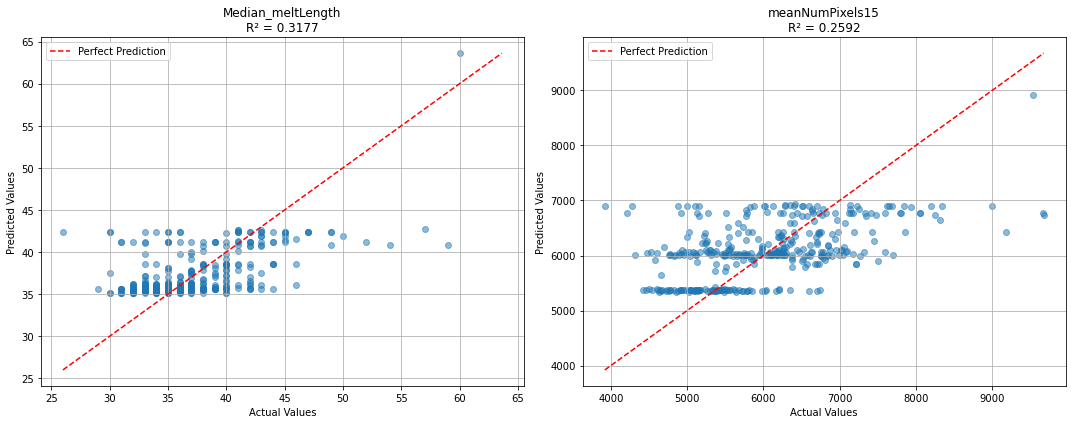


Evaluation Metrics:
MSE: 334294.3874
R² (Median_meltLength): 0.3177
R² (meanNumPixels15): 0.2592
Fold 5 Validation MSE: 334294.3874
Fold 5 R² scores: ['0.3177', '0.2592']

Cross-validation Results:
Average MSE: 325955.0667 ± 58031.0384
Average R² (Median_meltLength): 0.3198 ± 0.1751
Average R² (meanNumPixels15): 0.2347 ± 0.1199

Cross-validation Results:
Average MSE: 325955.0667 ± 58031.0384


In [3]:
import torch.nn as nn
import torch.optim as optim
import tqdm
from tqdm import tqdm
import copy

class MLPRegressor(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=128, num_layers=3, output_dim=2, dropout_rate=0.2):
        super(MLPRegressor, self).__init__()

        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.ReLU())
        #layers.append(nn.Dropout(dropout_rate))

        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.ReLU())
            #layers.append(nn.Dropout(dropout_rate))

        layers.append(nn.Linear(hidden_dim, output_dim))

        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)

def train_model(model, train_loader, val_loader, num_epochs=1000, patience=50):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)

    criterion = nn.L1Loss()
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

    best_val_loss = float('inf')
    best_model = None
    patience_counter = 0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_loader.dataset)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = copy.deepcopy(model)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    return best_model

def train_k_fold(X, y, fold_indices, hidden_dim=128, num_layers=3, batch_size=32):
    models = []
    scalers = []
    scalers_y = []
    val_scores = []
    r2_scores_all = []

    for fold, (train_idx, val_idx) in enumerate(fold_indices):
        print(f'\nTraining Fold {fold+1}')

        # Prepare data for this fold
        train_loader, val_loader, scaler, scaler_y = prepare_fold_data(
            X, y, train_idx, val_idx, batch_size
        )

        # Initialize and train model
        model = MLPRegressor(
            input_dim=X.shape[1],
            hidden_dim=hidden_dim,
            num_layers=num_layers,
            output_dim=y.shape[1]
        )

        best_model = train_model(
            model,
            train_loader,
            val_loader,
            num_epochs=1000,
            patience=50
        )

        # Store the trained model and scalers
        models.append(best_model)
        scalers.append(scaler)
        scalers_y.append(scaler_y)

        # Calculate validation scores
        mse, r2_scores, predictions, actuals = evaluate_model(best_model, val_loader, scaler_y)
        val_scores.append(mse)
        r2_scores_all.append(r2_scores)
        print(f'Fold {fold+1} Validation MSE: {mse:.4f}')
        print(f'Fold {fold+1} R² scores: {[f"{r2:.4f}" for r2 in r2_scores]}')

    
    # Calculate and print average metrics
    print("\nCross-validation Results:")
    print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")
    r2_scores_all = np.array(r2_scores_all)
    for i, target in enumerate(['Median_meltLength', 'meanNumPixels15']):
        mean_r2 = np.mean(r2_scores_all[:, i])
        std_r2 = np.std(r2_scores_all[:, i])
        print(f"Average R² ({target}): {mean_r2:.4f} ± {std_r2:.4f}")
    
    return models, scalers, val_scores, r2_scores_all

def evaluate_model(model, data_loader, scaler_y):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0

    # Lists to store predictions and actual values
    all_predictions = []
    all_actuals = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)

            # Move to CPU and convert to numpy
            outputs_np = outputs.cpu().numpy()
            y_batch_np = y_batch.cpu().numpy()

            # Inverse transform
            outputs_inv = scaler_y.inverse_transform(outputs_np)
            y_batch_inv = scaler_y.inverse_transform(y_batch_np)

            # Compute loss in original scale
            loss = criterion(torch.tensor(outputs_inv), torch.tensor(y_batch_inv))
            total_loss += loss.item() * X_batch.size(0)

            all_predictions.append(outputs_inv)
            all_actuals.append(y_batch_inv)

    # Convert lists to numpy arrays
    predictions = np.vstack(all_predictions)
    actuals = np.vstack(all_actuals)

    # Calculate MSE
    mse = total_loss / len(data_loader.dataset)

    # Calculate R² for each target
    r2_scores = []
    for i in range(actuals.shape[1]):
        ss_res = np.sum((actuals[:, i] - predictions[:, i]) ** 2)
        ss_tot = np.sum((actuals[:, i] - np.mean(actuals[:, i])) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        r2_scores.append(r2)

    # Create plots
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    target_names = ['Median_meltLength', 'meanNumPixels15']

    for i, (ax, target) in enumerate(zip(axes, target_names)):
        # Plot predicted vs actual
        ax.scatter(actuals[:, i], predictions[:, i], alpha=0.5)

        # Plot perfect prediction line
        min_val = min(actuals[:, i].min(), predictions[:, i].min())
        max_val = max(actuals[:, i].max(), predictions[:, i].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

        # Add labels and title
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{target}\nR² = {r2_scores[i]:.4f}')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

    # Print detailed metrics
    print("\nEvaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    for i, target in enumerate(target_names):
        print(f"R² ({target}): {r2_scores[i]:.4f}")

    return mse, r2_scores, predictions, actuals


# Train the models
models, scalers, val_scores, r2_scores_all = train_k_fold(X, y, fold_indices, 
                                                          hidden_dim=512, num_layers=12,
                                                          batch_size=128)

# Print overall results
print("\nCross-validation Results:")
print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")

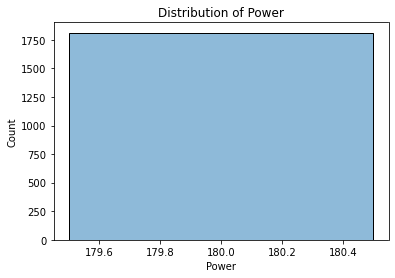

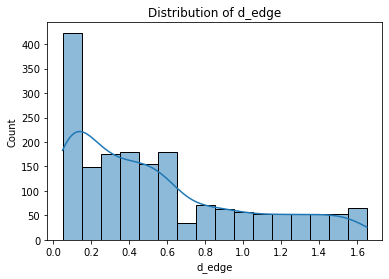

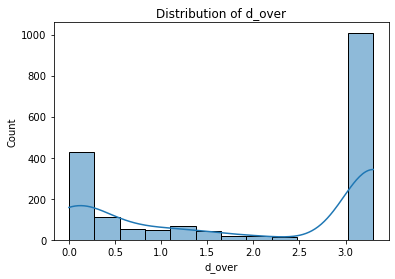

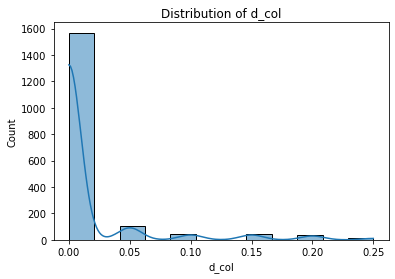

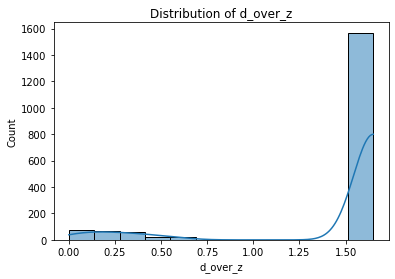

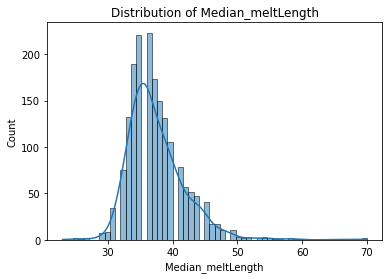

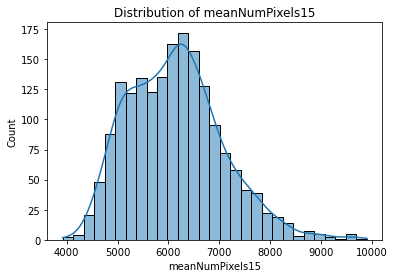

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each feature
for col in input_cols + target_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


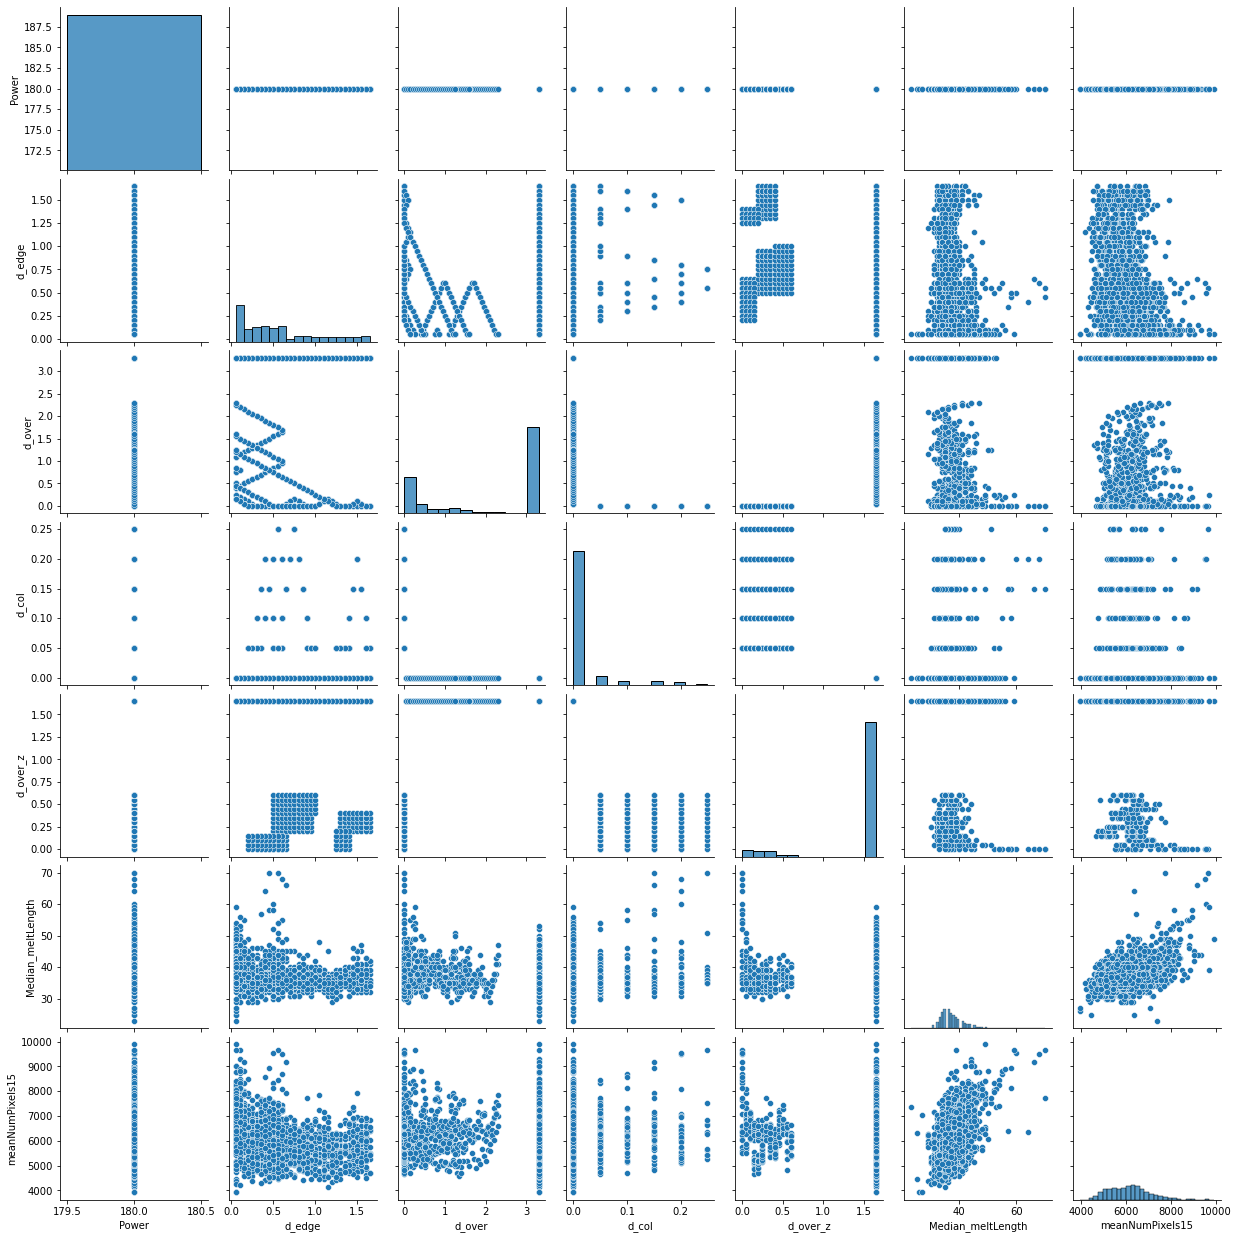

In [5]:
import seaborn as sns

sns.pairplot(data[input_cols + target_cols])
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming train_idx and val_idx are from the first fold
train_idx, val_idx = fold_indices[0]
X_train, X_val = X[train_idx], X[val_idx]
y_train, y_val = y[train_idx], y[val_idx]

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred, multioutput='raw_values')
print(f'Linear Regression MSE: {mse:.4f}')
print(f'Linear Regression R² scores: {r2}')


Linear Regression MSE: 342692.5190
Linear Regression R² scores: [0.10923817 0.15941935]


In [7]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred, multioutput='raw_values')
print(f'Random Forest MSE: {mse:.4f}')
print(f'Random Forest R² scores: {r2}')


Random Forest MSE: 300608.8786
Random Forest R² scores: [0.41819971 0.26264035]
